**APS 4° SEMESTRE ALGORITMOS DE ORDENAÇÃO DE DADOS**

In [1]:
import time

In [2]:
# função responsável por converter cada registro do arquivo em int.
def read_file_dat(file_path):
    with open(file_path, 'r') as f:
        data = [int(linha.strip()) for linha in f]
    return data

**QUICKSORT:**

In [3]:
# função responsável por fazer o quicksort
def quicksort(arr):
    # verificando se o array tem 1 elemento ou 0.
    #Caso essa condição for verdadeira, não é necessário ordenar os registros.
    if len(arr) <= 1:
        return arr
    else:
        # Lógica responsável por atribuir a uma variável o elemento central do array.
        pivot = arr[len(arr) // 2]

        # Sublista responsável por armazenar todos os elementos menores que o pivot.
        left = [x for x in arr if x < pivot]

        # Sublista responsável por armazenar todos os elementos iguais ao pivot. Caso exista.
        middle = [x for x in arr if x == pivot]

        # Sublista responsável por armazenar todos os elementos maiores que o pivot.
        right = [x for x in arr if x > pivot]

        # Concatenação das listas ordenadas.
        return quicksort(left) + middle + quicksort(right)

**MERGE SORT:**

In [4]:
# Função de ordenação Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        # Ordena cada metade
        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        # Mescla as duas metades
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        # Adiciona os elementos restantes de cada metade
        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

**HEAP SORT:**

In [5]:
# Função de ordenação do Heap Sort

def heapify(arr, n, i):
    largest = i  # Inicializa o maior como raiz
    left = 2 * i + 1  # filho da esquerda
    right = 2 * i + 2  # filho da direita

    # Verifica se o filho da esquerda é maior que a raiz
    if left < n and arr[largest] < arr[left]:
        largest = left

    # Verifica se o filho da direita é maior que o maior até agora
    if right < n and arr[largest] < arr[right]:
        largest = right

    # Se o maior não é a raiz
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Troca

        # Recursivamente heapify a subárvore afetada
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    # Construindo o heap (rearranjo do array)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Um a um extrai os elementos do heap
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Troca
        heapify(arr, i, 0)

In [6]:
# Função responsável por medir o tempo de execução.
def measure_time(sort_function, arr):
    start_time = time.time()
    sort_function(arr)
    end_time = time.time()
    return end_time - start_time

In [7]:
# Função responsável por adicionar em uma lista o tempo de execução de cada arquivo em ordem decrescente.
# measure_list é o parâmetro que receberá lista vazia.
# fun_sort é o parâmetro que receberá a função do algoritmo de ordenação.
# *datasets é o parâmetro que receberá todos os arquivos .dat
def add_measures(measure_list, func_sort, *datasets):
    for data in datasets:
        measure_list += [measure_time(func_sort, data)]
    measure_list.sort(reverse=True)

In [8]:
# Armazenamento dos dados contidos no arquivos .dat em variáveis.
data1 = read_file_dat('/content/rnd500000.dat')
data2 = read_file_dat('/content/rnd500000_desc.dat')
data3 = read_file_dat('/content/Rnd100000.dat')
data4 = read_file_dat('/content/Rnd5000001.dat')

In [9]:
# Listas para armazenar os tempos de execução
measure_in_sec_quick = []
measure_in_sec_merge = []
measure_in_sec_heap = []

In [10]:
# Executa e mede o tempo de QuickSort
add_measures(measure_in_sec_quick, quicksort, data1[:], data2[:], data3[:], data4[:])

In [11]:
# Executa e mede o tempo de Merge Sort
add_measures(measure_in_sec_merge, merge_sort, data1[:], data2[:], data3[:], data4[:])

In [12]:
# Executa e mede o tempo de Heap Sort
add_measures(measure_in_sec_heap, heap_sort, data1[:], data2[:], data3[:], data4[:])

In [13]:
# Importando a biblioteca para plotar os gráficos.
import matplotlib.pyplot as plt

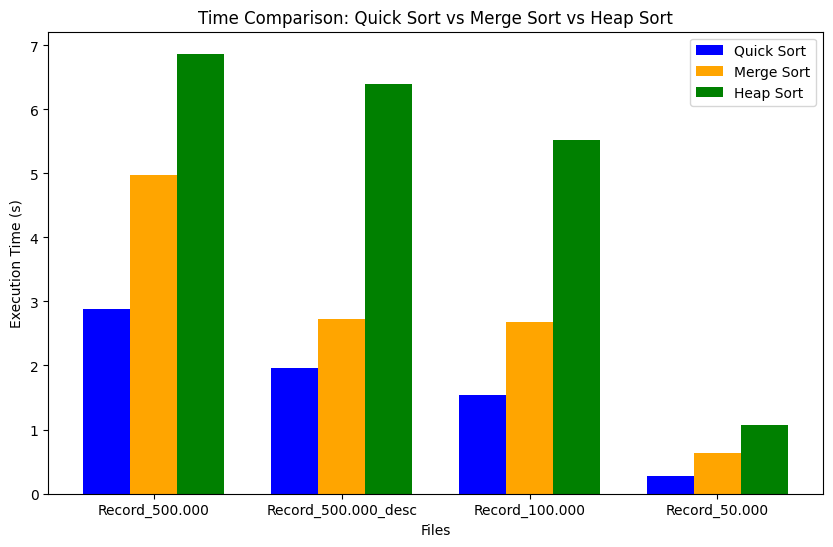

In [14]:
plt.figure(figsize=(10, 6))
# Rótulo para cada setor do gráfico.
labels = ['Record_500.000', 'Record_500.000_desc', 'Record_100.000', 'Record_50.000']

# Ajuste para as posições das barras
x = range(len(labels))

# Plotando Quick Sort
plt.bar([p - 0.25 for p in x], measure_in_sec_quick, color='blue', width= 0.25, label="Quick Sort", align='center')

# Plotando Merge Sort
plt.bar(x, measure_in_sec_merge, color='orange', width= 0.25, label="Merge Sort", align='center')

# Plotando Heap Sort
plt.bar([p + 0.25 for p in x], measure_in_sec_heap, color='green', width= 0.25, label="Heap Sort", align='center')

plt.xticks(x, labels)  # Ajustando as marcas no eixo x
plt.xlabel('Files')
plt.ylabel('Execution Time (s)')
plt.title('Time Comparison: Quick Sort vs Merge Sort vs Heap Sort')
plt.legend()
plt.show()

In [15]:
# Função responsável por calcular a média de cada lista
def execution_average(measure_list, average_execution_per_algorithm):
  algoritm_average  = sum(measure_list) / len(measure_list)
  average_execution_per_algorithm.append(algoritm_average)
  return average_execution_per_algorithm

In [16]:
# lista das médias
average_execution_per_algorithm = []

In [17]:
execution_average(measure_in_sec_heap, average_execution_per_algorithm)

[4.965671122074127]

In [18]:
execution_average(measure_in_sec_merge, average_execution_per_algorithm)

[4.965671122074127, 2.7520865201950073]

In [19]:
execution_average(measure_in_sec_quick, average_execution_per_algorithm)

[4.965671122074127, 2.7520865201950073, 1.6655001640319824]

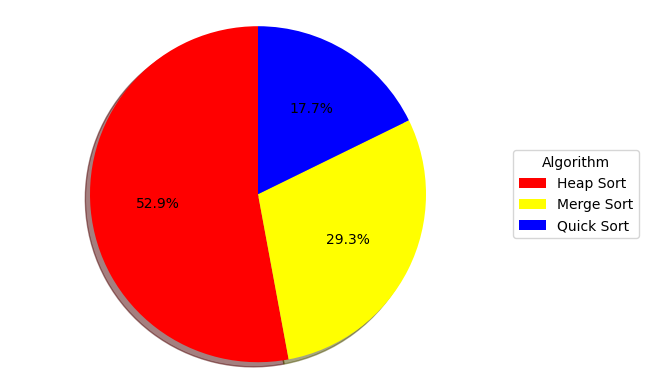

In [20]:
# Rótulo para cada setor do gráfico.
labels = ['Heap Sort', 'Merge Sort', 'Quick Sort']

# Valores númericos de cada setor.
sizes =  average_execution_per_algorithm

# Cor de cada setor.
colors = ['red', 'yellow', 'blue']

# autopct='%1.1f%%' Formata com uma casa decimal.
# shadow=True Cria uma sombra para o gráfico. Traz um aspecto 3D.
# startangle=90 Define o ângulo inicial do gráfico.
plt.pie(sizes, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

# Garante que o gráfico seja desenhado como um círculo perfeito.
plt.axis('equal')

plt.legend(labels, title="Algorithms", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()